# matplotlib基本使用

In [1]:
import matplotlib.pyplot as plt

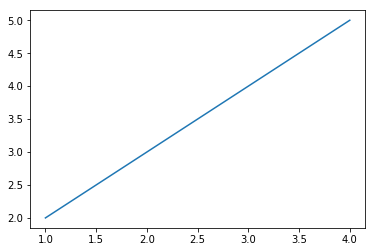

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot([1,2,3,4],[2,3,4,5])
plt.show()

# plot方法绘图函数

In [4]:
def PlotDemo1():
    fig  = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot([1,2,3,4],[2,3,4,5])
    plt.show()

# 增加标题和坐标轴说明

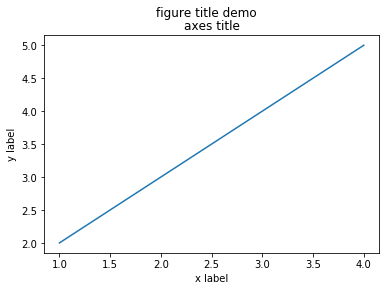

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.suptitle('figure title demo')
ax.set_title("axes title")
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.plot([1,2,3,4],[2,3,4,5])
plt.show()

# 股价基本走势图

股票的K线图（以日K为例）由日期和价格组成，形成X-Y坐标轴，按照前面的绘图方案，需要传入日期数组和价格数组即可。

numpy是常用的数据处理库，将000001.SZ的股价数据（时间范围从20150101到20150930）导入到csv中，然后通过numpy读取得到日期和价格数组。csv文件中包含了两列，日期和价格，分割符号为","，读取过程代码如下：

dates, close = np.loadtxt(filename,delimiter=",", unpack= True, converters={0:mdates.strpdate2num('%Y-%m-%d')})

numpy的loadtxt方法：设定了文件中的分隔符号为“，”，unpack是否将数组拆分，True为拆分，即：得到两个数组分别表示日期和收盘价格，converters是将日期类型的字符串转为数组，因为numpy规定其数组中的类型需要一致。

# 绘制基础走势图

通过numpy得到日期和收盘价格之后，参照先前的示例，通过plot方法进行绘制

ax1.plot(dates,close)

在上图中，x轴通过数值标识，而不是日期类型。因为我们通过numpy构造数组时，日期按照数值类型存储，可以通过如下方法转换为日期类型

X-轴设置主要刻度locator为每日刻度，格式为：DateFormatter("%Y-%m-%d")，每日刻度从第1日到第31日，间隔为15日。

ax1.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=15))

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

对于X-轴上面的每个ticker标签都向右倾斜45度，这样标签不会重叠在一起便于查看。

for label in ax1.xaxis.get_ticklabels(): label.set_rotation(45)

也可以按照每月进行显示，X-轴设置主要刻度为每月刻度

ax1.xaxis.set_major_locator(mdates.MonthLocator())

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# 图形边框调整

plt.subplots_adjust(bottom=0.13,top=0.95)

# 绘制价格平均线

在前面的示例中绘制了基本的股票走势图，本节我们利用ta-lib【4】证券技术指标库，绘制5日和10日价格平均线。

ta-lib中提供了方法talib.SMA得到价格简单平均线，timeperiod为时间参数，timeperiod=5为五日均线，基于上图增加五日和十日均线，代码如下：

sma5 = talib.SMA(close, timeperiod = 5)

ax1.plot(dates,sma5)

sma10 = talib.SMA(close, timeperiod = 10)

ax1.plot(dates,sma10)

其中，sma5和sma10均为numpy数组。

图表如下所示：

在坐标轴中有三条曲线，matplotlib会自动改变线条颜色，此时如果没有说明并不方便使用，可以在右上角增加图例，表明各线条所代表的含义，并增加图表的网格效果，代码如下：

plt.legend(('daily', 'SMA5', 'SMA10'))

plt.grid(True)

图表如下所示：

# 总结

本章对于matplotlib的基本使用方法进行了介绍，并绘制了基本的股票价格和均线走势图。在后面的章节中对于上述图表增加成交量、MACD值等数据。